In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

# This code block imports all the libraries we need, saves all the functions, and
# reads data from CSV and prepares it for analysis

# IMPORT NECESSARY LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize


## FUNCTIONS WE HAVE WRITTEN
# Simulate the SIR model if we know alpha, beta, S0, I0, R0
def sirBasic(S0, I0, R0, alpha, beta, n):
    # Make an empty 3 by 101 matrix that will be the predicted number of people in each group
    SIR = np.zeros((3,n+1))

    # fill in the initial data
    SIR[:,0] = np.array([S0, I0, R0])

    for i in range(n):
        SIR[:,i+1] = SIR[:,i] + np.array([-beta*SIR[0,i]*SIR[1,i], beta*SIR[0,i]*SIR[1,i] - alpha*SIR[1,i], alpha*SIR[1,i]])

    return SIR

# Advanced SIR Model
# alpha1 transitions to alpha2 according to a sigmoid curve
# (center of transition at time n1 and k1 controls how fast it transitions)
# beta1 transitions to beta2 according to a sigmoid curve
# (center of transition at time m1 and j1 controls how fast it transitions)

# Sigmoid function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Advanced SIR simulation
def sirAdvanced(S0, I0, R0, alpha1, alpha2, beta1, beta2, n1, m1, k, j, n):
    # Make an empty 3 by 101 matrix that will be the predicted number of people in each group
    SIR = np.zeros((3,n+1))

    # fill in the initial data
    SIR[:,0] = np.array([S0, I0, R0])

    for i in range(n):
        # update alpha
        alpha = (alpha2 - alpha1)*sigmoid(k*(i - n1)) + alpha1

        # update beta
        beta = (beta2 - beta1)*sigmoid(j*(i - m1)) + beta1

        SIR[:,i+1] = SIR[:,i] + np.array([-beta*SIR[0,i]*SIR[1,i], beta*SIR[0,i]*SIR[1,i] - alpha*SIR[1,i], alpha*SIR[1,i]])

    return SIR

# Function that computes the error between simulated data and real data
def findError(data, simulated):
    return math.sqrt(np.sum((data - simulated)**2))

# Gradient descent method that minimizes a function of one variable
def gradientDescent1D(f, x0, h, tolerance, maxIterations):
    x = x0
    step = h

    for counter in range(maxIterations+1):
        slope = (f(x+step) - f(x))/step
        step = -slope*h
        x = x + step

        if x < 0:
            x = -1*x

        if math.fabs(slope) < tolerance:
            print('1D gradient descent took', counter, 'iterations to converge')
            print('The slope at', x, 'is approximately', slope)
            return x
            break

        if counter == maxIterations:
            print('1D gradient descent failed')
            print('The slope at', x, 'is approximately', slope)
            return x

## DATA PREPARATION AND READING FROM CSV
# Read real data from a CSV file and run the basic SIR model (skip row 1, ignore column 0)

data = np.genfromtxt('COVID19DataSK.csv', delimiter=',', skip_header = 1, usecols = (1, 2, 3, 4))
#data = np.genfromtxt('COVID19DataUSlimited.csv', delimiter=',', skip_header = 1, usecols = (1, 2, 3, 4))
#data = np.genfromtxt('Covid19DataUSLimitedEditedRecovery.csv', delimiter=',', skip_header = 1, usecols = (1, 2, 3, 4))

# Turn the columns into rows
data = np.transpose(data)

# Find the number of days in the real data
lastDay = int(data[0,-1])

# Delete the "day" row in the real data so it will have S, I, and R rows like our SIR models
data = data[1:4,:]

# Pull initial data values from the real data
S0 = data[0,0]
I0 = data[1,0]
R0 = data[2,0]

In [13]:
# Plot the simulated SIR curves

x = range(43+1)

plt.plot(x,SIR[0,:], label='Susceptible')
plt.plot(x,SIR[1,:], label='Infectious')
plt.plot(x,SIR[2,:], label='Recovered')

plt.legend()

NameError: name 'SIR' is not defined

In [14]:
# The effect of different beta values

for b in np.arange(0.01,0.1,0.01):
    print('SIR model for beta =', b/10000)
    SIR = sirBasic(10000,10,0,0.03,b/10000,365)
    print('In this case, the maximum of I(t) is approximately', max(SIR[1,:]))
    #print(SIR)

SIR model for beta = 1e-06
In this case, the maximum of I(t) is approximately 10.0
SIR model for beta = 2e-06
In this case, the maximum of I(t) is approximately 10.0
SIR model for beta = 3e-06
In this case, the maximum of I(t) is approximately 10.0
SIR model for beta = 4e-06
In this case, the maximum of I(t) is approximately 239.20007065540761
SIR model for beta = 5e-06
In this case, the maximum of I(t) is approximately 950.0096732280957
SIR model for beta = 6e-06
In this case, the maximum of I(t) is approximately 1555.363065532846
SIR model for beta = 6.999999999999999e-06
In this case, the maximum of I(t) is approximately 2111.566100652572
SIR model for beta = 8e-06
In this case, the maximum of I(t) is approximately 2608.544535120455
SIR model for beta = 9e-06
In this case, the maximum of I(t) is approximately 3049.6862450404155


ValueError: x and y must have same first dimension, but have shapes (101,) and (366,)

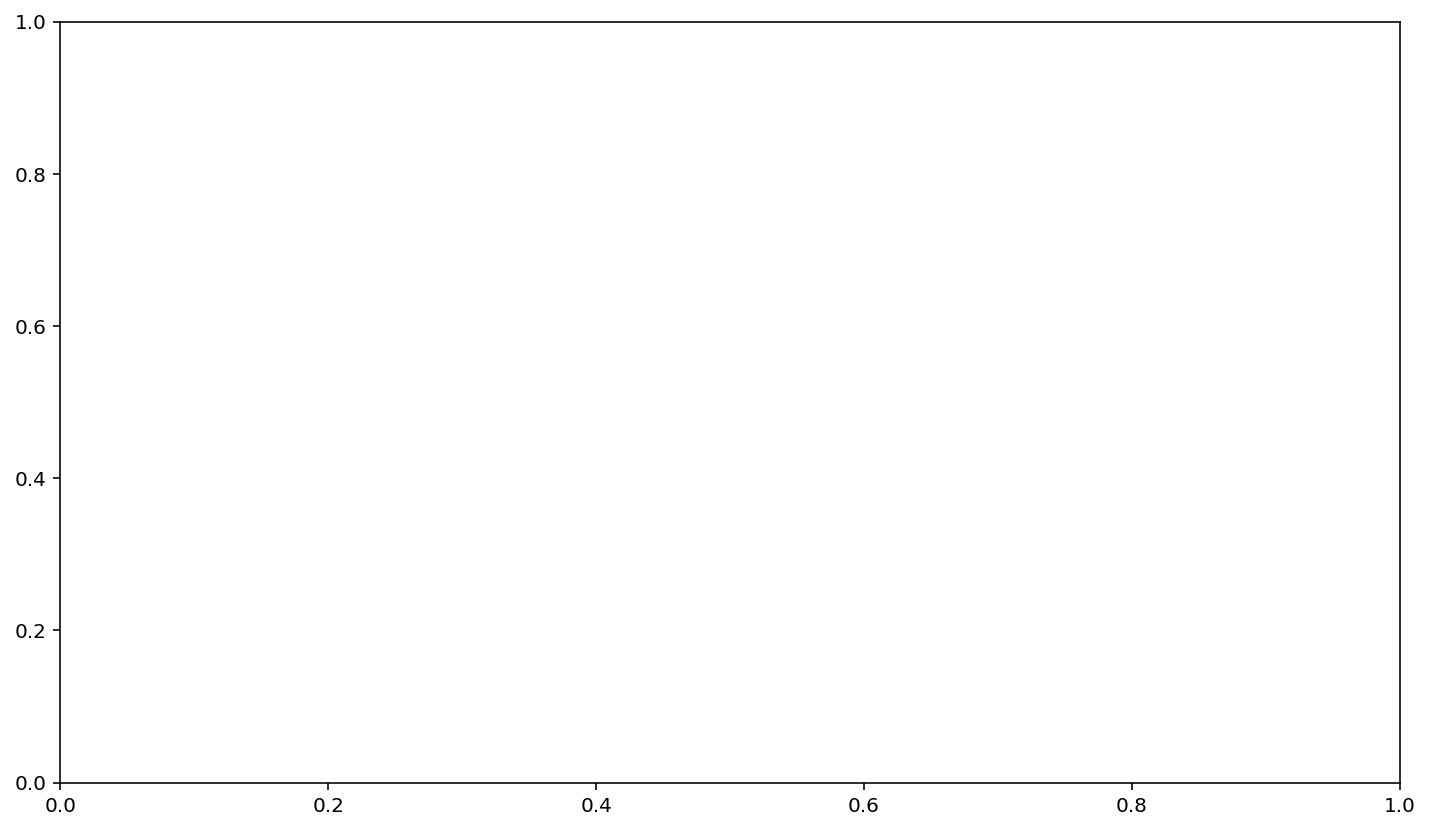

In [15]:
# Plot the results
x = range(100+1)

plt.plot(x,SIR[0,:], label='Susceptible')
plt.plot(x,SIR[1,:], label='Infectious')
plt.plot(x,SIR[2,:], label='Recovered')

plt.legend()

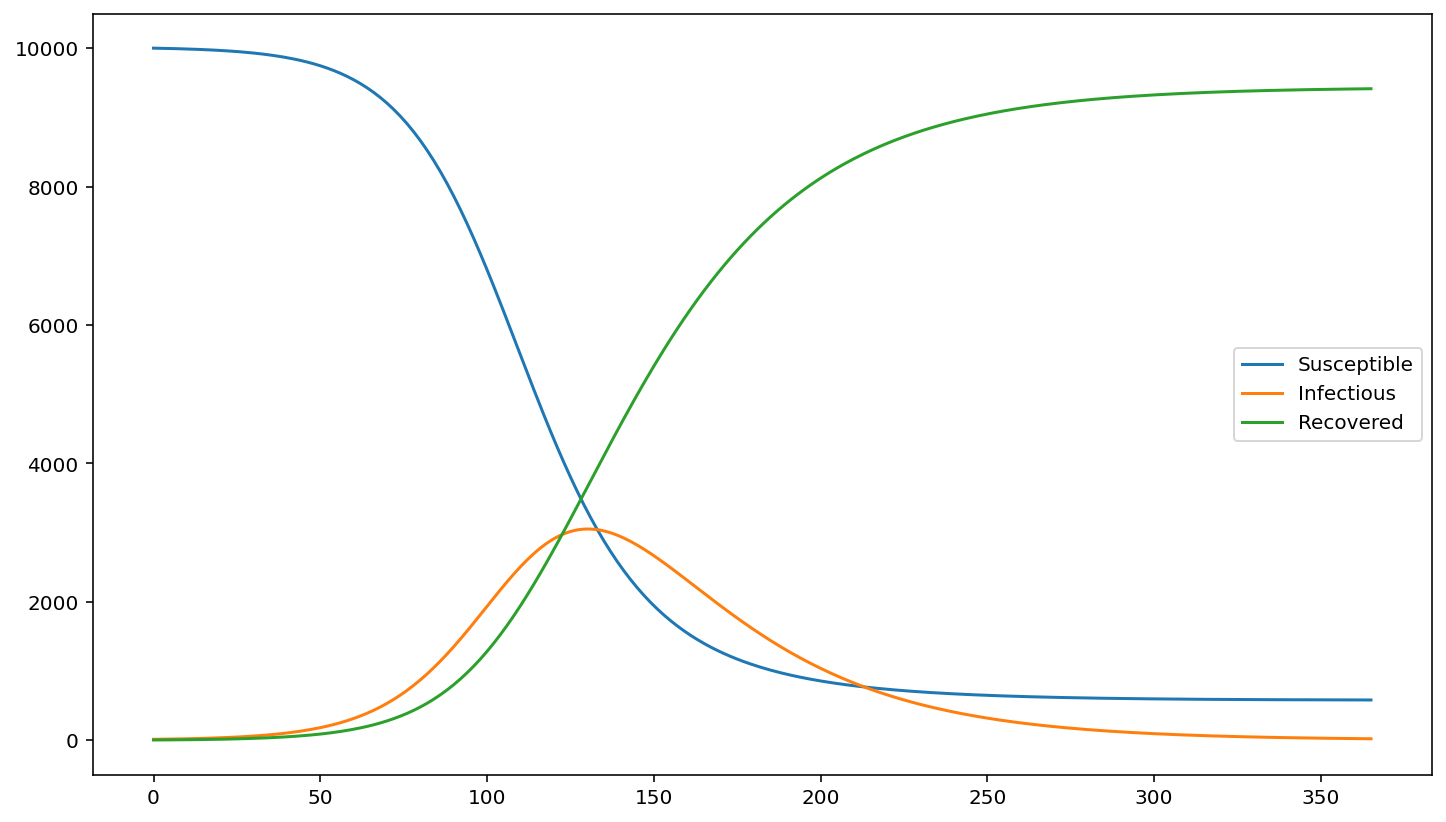

In [16]:
# plot the results

x = range(365+1)

plt.plot(x,SIR[0,:], label='Susceptible')
plt.plot(x,SIR[1,:], label='Infectious')
plt.plot(x,SIR[2,:], label='Recovered')

plt.legend()

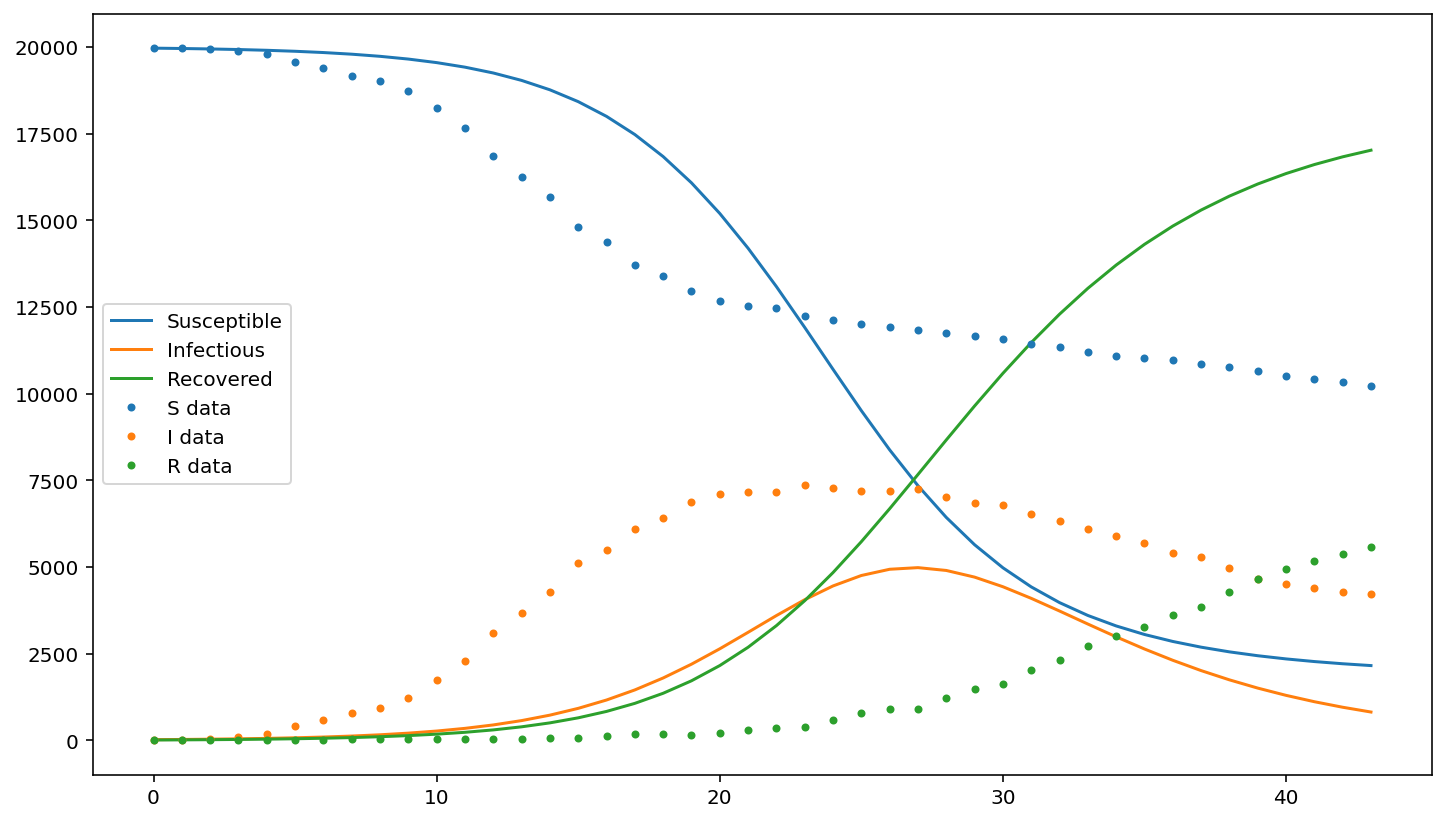

In [4]:
simulated = sirBasic(S0,I0,R0,0.2,0.25/10000,lastDay)

# Plot the simulated data for the best parameters we found

x = range(lastDay+1)

# Plot the simulated data as curves
plt.plot(x,simulated[0,:], label='Susceptible')
plt.plot(x,simulated[1,:], label='Infectious')
plt.plot(x,simulated[2,:], label='Recovered')

# Plot the real data as dots
plt.plot(x,data[0,:], '.', color='tab:blue', label='S data')
plt.plot(x,data[1,:], '.', color='tab:orange', label='I data')
plt.plot(x,data[2,:], '.', color='tab:green', label='R data')

plt.legend()

In [49]:
bestError = np.array([0, 0, 1000000000000000000])

alpha = 0.3
for b in np.arange(0.01, 1, 0.01):
    # Run the basic model and find the error between the real data and simulated data
    simulated = sirBasic(S0,I0,R0,alpha,b/S0,lastDay)
    error = findError(data,simulated)
    # If the error is smaller than we have found so far, record the parameters and error
    if error < bestError[-1]:
        bestError = np.array([alpha, b, error])
            
print(bestError)

[3.00000000e-01 4.90000000e-01 3.81108921e+04]


In [52]:
# This code will brute-force test many combinations of alpha and beta and record the pair
# of values that minimize the error

bestError = np.array([0, 0, 1000000000000000000])

for alpha in np.arange(0.01, 0.5, 0.01):
    # find the best beta using gradient descent (TRY THIS)

    # If the error is smaller than we have found so far, record the parameters and error
    if error < bestError[-1]:
        bestError = np.array([alpha, b, error])
            
print(bestError)

[1.00000000e-01 3.00000000e-01 3.47442894e+04]


In [87]:
# This code will brute-force test many combinations of alpha and beta and record the pair
# of values that minimize the error

bestError = np.array([0, 0, 1000000000000000000])

for alpha in np.arange(0.01, 0.5, 0.01):
    for b in np.arange(0.01, 1, 0.01):
        # Run the basic model and find the error between the real data and simulated data
        simulated = sirBasic(S0,I0,R0,alpha,b/S0,lastDay)
        error = findError(data,simulated)

        # If the error is smaller than we have found so far, record the parameters and error
        if error < bestError[-1]:
            bestError = np.array([alpha, b, error])
            
print(bestError)

[1.00000000e-01 3.00000000e-01 3.47442894e+04]


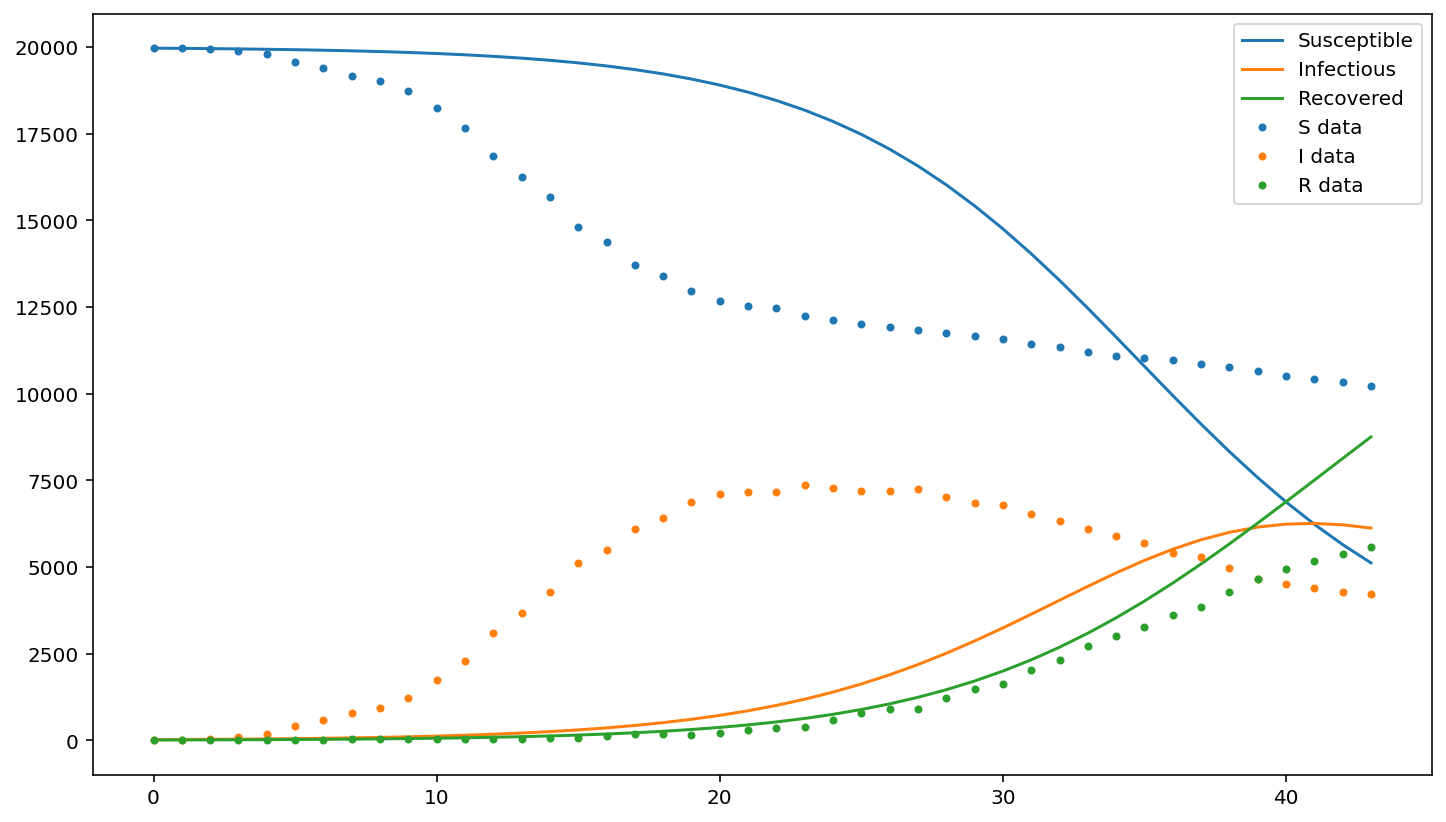

In [22]:
# Plot the simulated data for the best parameters we found
simulated = sirBasic(S0,I0,R0,bestError[0],bestError[1]/S0,lastDay)

# Plot the simulated data
x = range(lastDay+1)

# Plot the simulated data as curves
plt.plot(x,simulated[0,:], label='Susceptible')
plt.plot(x,simulated[1,:], label='Infectious')
plt.plot(x,simulated[2,:], label='Recovered')

# Plot the real data as dots
plt.plot(x,data[0,:], '.', color='tab:blue', label='S data')
plt.plot(x,data[1,:], '.', color='tab:orange', label='I data')
plt.plot(x,data[2,:], '.', color='tab:green', label='R data')

plt.legend()

In [5]:
# x^2 at 2
f = lambda x: x**2
gradientDescent1D(f,2,0.4,0.001,100)

# Sine at 2 with too large initial step
f = lambda x: math.sin(x)
gradientDescent1D(f, 2, 2, 0.001, 10000)

# Sine at 2 with slightly too large step
f = lambda x: math.sin(x)
gradientDescent1D(f, 2, 1, 0.01, 10000)

# Sine at 2 with a good step size
f = lambda x: math.sin(x)
gradientDescent1D(f, 2, 0.8, 0.01, 10000)

# Sine at 0 with a good step size
f = lambda x: math.sin(x)
gradientDescent1D(f, 0, 0.8, 0.001, 10000)

# Polynomial with a good step size
f = lambda x: x**4 - 4*x**2 + x - 2

h = 0.05
print('Starting at 0...')
gradientDescent1D(f, 0, h, 0.001, 10000)

print('Starting at -2...')
gradientDescent1D(f, -2, h, 0.001, 10000)

print('Starting at 2.5...')
gradientDescent1D(f, 2.5, h, 0.001, 10000)

1D gradient descent took 21 iterations to converge
The slope at 0.00034273883869977525 is approximately -0.0006547285234524624
1D gradient descent failed
The slope at 6.008578269581178 is approximately -0.78539816339745
1D gradient descent failed
The slope at 4.705971170982758 is approximately 0.012835912547974697
1D gradient descent took 9 iterations to converge
The slope at 4.699761607245337 is approximately -0.0033915492546134477
1D gradient descent failed
The slope at 0.7187714479344052 is approximately 0.9178643187766529
Starting at 0...
1D gradient descent failed
The slope at 0.03453668922042032 is approximately 1.048599505176536
Starting at -2...
1D gradient descent took 17 iterations to converge
The slope at 1.3469395197492715 is approximately -0.0007322287509497544
Starting at 2.5...
1D gradient descent took 25 iterations to converge
The slope at 1.3469402879370984 is approximately -0.0008597501079873689


1.3469402879370984

In [6]:
# assume x = b where b = beta*S0
# f(x) = ERR(0.3,x)
f = lambda x: findError(sirBasic(S0,I0,R0,0.3,x/S0,lastDay), data)

gradientDescent1D(f,0.49,0.000001,0.01,10000)

1D gradient descent failed
The slope at 0.524594881569657 is approximately -75594.87975009852


0.524594881569657

In [9]:
# This code will brute-force test many combinations of alpha and beta and record the pair
# of values that minimize the error

bestError = np.array([0, 0, 1000000000000000000])

for alpha in np.arange(0.01, 0.4, 0.01):
    # find the best beta using gradient descent (TRY THIS)
    f = lambda x: findError(sirBasic(S0,I0,R0,alpha,x/S0,lastDay), data)
    b = gradientDescent1D(f,0.1,0.00001,0.01,1000)
    error = f(b)

    # If the error is smaller than we have found so far, record the parameters and error
    if error < bestError[-1]:
        bestError = np.array([alpha, b, error])
        print(bestError)

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:60: RuntimeWarning: overflow encountered in square


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at 0.4084563271540546 is approximately 224.54794577426262
[4.00000000e-02 4.08456327e-01 5.83737800e+04]


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


1D gradient descent failed
The slope at nan is approximately nan


In [10]:
# This code block imports all the libraries we need, saves all the functions, and
# reads data from CSV and prepares it for analysis

# IMPORT NECESSARY LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import math


## FUNCTIONS WE HAVE WRITTEN
# Simulate the SIR model if we know alpha, beta, S0, I0, R0
def sirBasic(S0, I0, R0, alpha, beta, n):
    # Make an empty 3 by 101 matrix that will be the predicted number of people in each group
    SIR = np.zeros((3,n+1))

    # fill in the initial data
    SIR[:,0] = np.array([S0, I0, R0])

    for i in range(n):
        SIR[:,i+1] = SIR[:,i] + np.array([-beta*SIR[0,i]*SIR[1,i], beta*SIR[0,i]*SIR[1,i] - alpha*SIR[1,i], alpha*SIR[1,i]])

    return SIR

# Advanced SIR Model
# alpha1 transitions to alpha2 according to a sigmoid curve
# (center of transition at time n1 and k1 controls how fast it transitions)
# beta1 transitions to beta2 according to a sigmoid curve
# (center of transition at time m1 and j1 controls how fast it transitions)

# Sigmoid function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Advanced SIR simulation
def sirAdvanced(S0, I0, R0, alpha1, k1, alpha2, beta1, j1, beta2, n, n1, m1):
    # Make an empty 3 by 101 matrix that will be the predicted number of people in each group
    SIR = np.zeros((3,n+1))

    # fill in the initial data
    SIR[:,0] = np.array([S0, I0, R0])

    for i in range(n):
        # update alpha
        alpha = (alpha2 - alpha1)*sigmoid(k1*(i - n1)) + alpha1

        # update beta
        beta = (beta2 - beta1)*sigmoid(j1*(i - m1)) + beta1

        SIR[:,i+1] = SIR[:,i] + np.array([-beta*SIR[0,i]*SIR[1,i], beta*SIR[0,i]*SIR[1,i] - alpha*SIR[1,i], alpha*SIR[1,i]])

    return SIR

# Function that computes the error between simulated data and real data
def findError(data, simulated):
    return math.sqrt(np.sum((data - simulated)**2))

# Gradient descent method that minimizes a function of one variable
def gradientDescent1D(f, x0, h, tolerance, maxIterations):
    x = x0
    step = h

    for counter in range(maxIterations+1):
        slope = (f(x+step) - f(x))/step
        step = -slope*h
        x = x + step
        
        if x < 0:
            x = -1*x

        if math.fabs(slope) < tolerance:
            print('1D gradient descent took', counter, 'iterations to converge')
            print('The slope at', x, 'is approximately', slope)
            return x
            break

        if counter == maxIterations:
            print('1D gradient descent failed')
            print('The slope at', x, 'is approximately', slope)
            return x

## DATA PREPARATION AND READING FROM CSV
# Read real data from a CSV file and run the basic SIR model (skip row 1, ignore column 0)

data = np.genfromtxt('COVID19DataSK.csv', delimiter=',', skip_header = 1, usecols = (1, 2, 3, 4))

# Turn the columns into rows
data = np.transpose(data)

# Find the number of days in the real data
lastDay = int(data[0,-1])

# Delete the "day" row in the real data so it will have S, I, and R rows like our SIR models
data = data[1:4,:]

# Pull initial data values from the real data
S0 = data[0,0]
I0 = data[1,0]
R0 = data[2,0]

In [11]:
from scipy import optimize

# Make the ERR(alpha, beta) where x = [x[0], x[1]] = [alpha0, b0]
#f = lambda x: findError(data,sirBasic(S0,I0,R0,x[0],x[1]/S0,lastDay))

# Do the same for the advanced model where x = [x[0], x[1], x[2], ..., x[7]] = (alpha1, alpha2, beta1, beta2, n1, m1, k, j)
f = lambda x: findError(data,sirAdvanced(S0,I0,R0,x[0],x[1],x[2]/S0,x[3]/S0,x[4],x[5],x[6],x[7],lastDay))

# Choose alpha and beta that minimize this error function f(alpha,beta)
#result = optimize.minimize(f,[0.1,0.2],bounds=((0,1),(0,1)))
result = optimize.minimize(f, [0.1,0.1,0.2,0.2,lastDay/2,lastDay/2,1,1],
                          bounds=((0,1),(0,1),(0,1),(0,1),(0,lastDay),(0,lastDay),(-10,10),(-10,10)))

print(result)

x = result.x

TypeError: 'numpy.float64' object cannot be interpreted as an integer

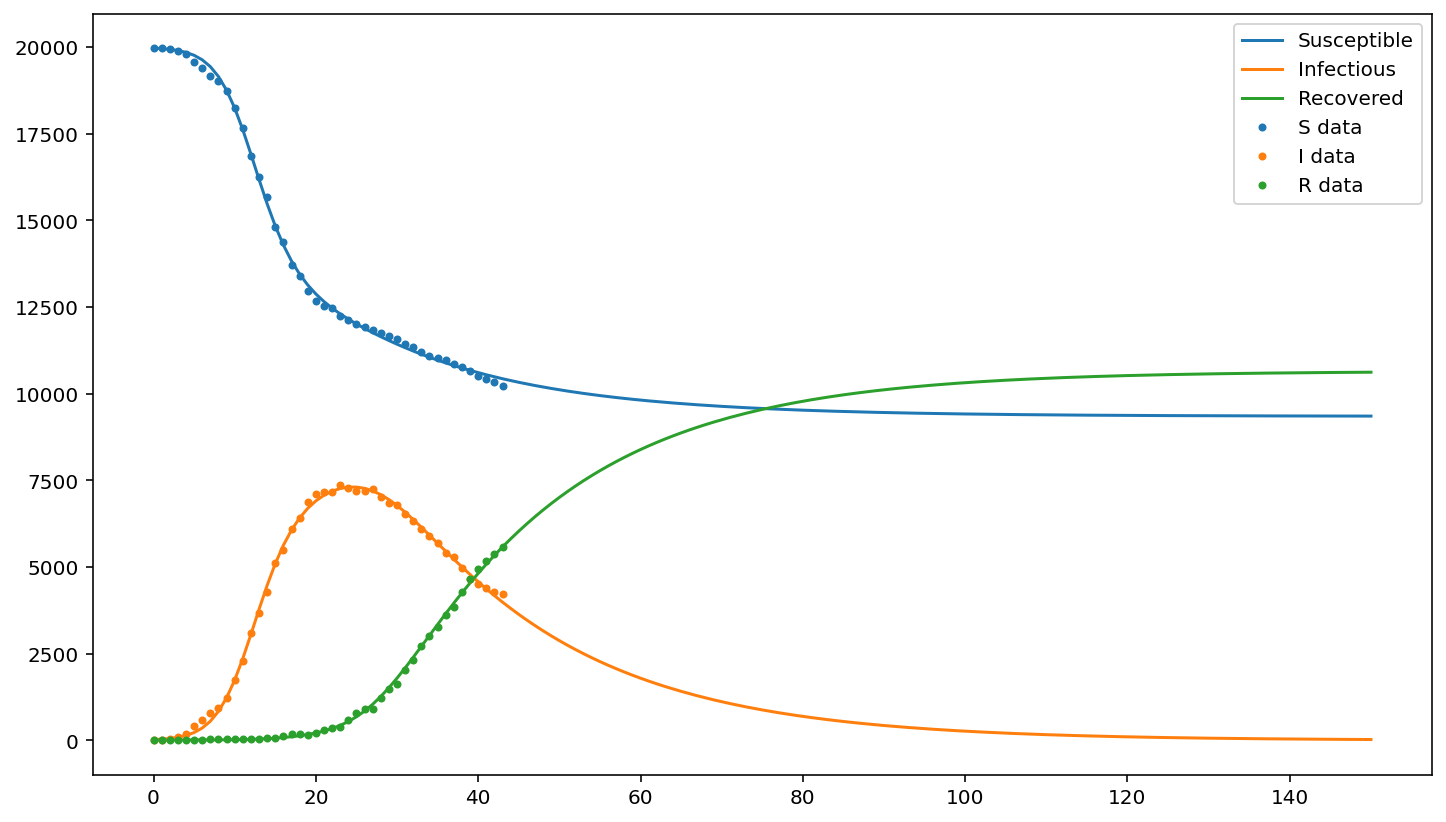

In [29]:
#simulated = sirBasic(S0,I0,R0,x[0],x[1]/S0,lastDay)
simulated = sirAdvanced(S0,I0,R0,x[0],x[1],x[2]/S0,x[3]/S0,x[4],x[5],x[6],x[7],150)

# Plot the simulated data for the best parameters we found

# Plot the simulated data as curves
plt.plot(simulated[0,:], label='Susceptible')
plt.plot(simulated[1,:], label='Infectious')
plt.plot(simulated[2,:], label='Recovered')

# Plot the real data as dots
plt.plot(data[0,:], '.', color='tab:blue', label='S data')
plt.plot(data[1,:], '.', color='tab:orange', label='I data')
plt.plot(data[2,:], '.', color='tab:green', label='R data')

plt.legend()

In [90]:
from scipy import optimize

# Let x = (x[0], x[1]) = (alpha, b)
# this is ERR(alpha,b)
f = lambda x: findError(sirBasic(S0,I0,R0,x[0],x[1]/S0,lastDay), data)

result = optimize.minimize(f, [0.1, 0.2], bounds = ((0,1), (0,1)))

print(result)

x = result.x

      fun: 34715.460820492815
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.034197  , -0.07421477])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 7
   status: 0
  success: True
        x: array([0.10090214, 0.30365289])
[0.10090214 0.30365289]
